`Crank-Nicolson: Equação de Schrödinger.`

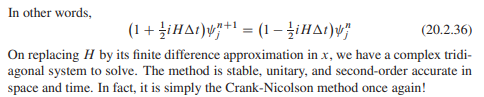

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

$u_{j, n} = -\alpha u_{j-1, n+1} + (1+2\alpha)u_{j,n+1} - \alpha u_{j+1, n+1}$ com $\alpha = \dfrac{D\Delta t}{(\Delta x)^2}$ agora com $D = i$ no caso do potencial nulo

In [2]:
# Parâmetros Numéricos

L = 5 # tamanho poco

Nx = 5_000
Nsteps = 100 # ou menos

x = np.linspace(0, L, Nx)


dx = x[1] - x[0] # 10e-3
dt = 1E-2

D = 1j

alpha = D * dt / dx**2 # D = 1


In [3]:
dx/dt, Nsteps*dt

(0.10002000400080016, 1.0)

#### Condição inicial - Pacote Gaussiano

Norma = 0.9999950110449706


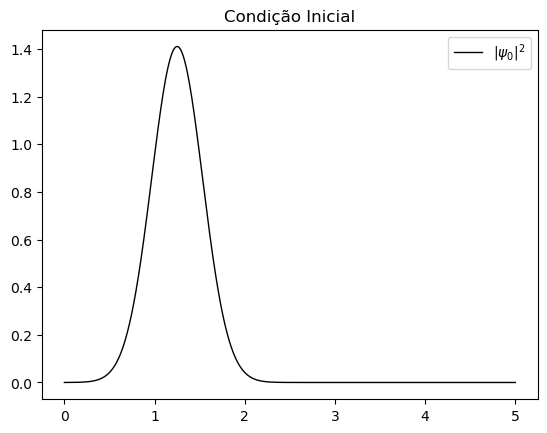

In [4]:
x0: float = L / 4 # posicao inicial do centro do pacote
omega: float = 0.4 # largura
p: float = 2 # momento 

# condicao inicial    
gaussiana = np.sqrt(1 / np.sqrt(np.pi) / omega) * np.exp(-(x - x0)**2 / 2 / omega**2)
psi0 = gaussiana * np.exp(1j * p * (x-x0))
# condição de contorno
psi0[0] = 0
psi0[-1] = 0
    
plt.title("Condição Inicial")
# plt.plot(x, psi0, label=r'$\psi_0$', ls='--')
plt.plot(x, np.abs(psi0)**2, label=r'$|\psi_0|^2$', color='k', lw=1)
plt.legend();

print("Norma =", np.trapz(np.abs(psi0)**2, x))

In [5]:
# Matriz tridiagonal do Crank-Nicolson
N = len(x)

A = np.zeros((N-2, N-2), dtype=complex)
B = np.zeros((N-2, N-2), dtype=complex)

# Diagonal Principal
for i in range(0, N-2):
    A[i,i] = 2 + 2*alpha
    B[i,i] = 2 - 2*alpha
# Outras duas diagonais
for i in range(0, N-3):
    
    A[i+1, i] = -alpha
    A[i, i+1] = -alpha
    
    B[i+1, i] = alpha
    B[i, i+1] = alpha

Ainv = np.linalg.inv(A)

In [6]:
# CrankNicolson
psi = np.zeros((Nsteps, Nx), dtype=complex)
psi[0] = psi0

# Condição de Contorno
psi[0][1] = 0 
psi[0][-1] = 0

# Crank-Nicolson 
for i in range(Nsteps - 1):
    psi[i+1][1:-1] = np.dot(Ainv, np.dot(B, psi[i][1:-1]))
    print("Norma =", np.trapz(np.abs(psi[i+1])**2, x))

Norma = 0.9999949288056926
Norma = 0.9999949288057132
Norma = 0.9999949288057435
Norma = 0.999994928805779
Norma = 0.9999949288058231
Norma = 0.9999949288058765
Norma = 0.9999949288059377
Norma = 0.9999949288059986
Norma = 0.9999949288060611
Norma = 0.9999949288061258
Norma = 0.9999949288061918
Norma = 0.9999949288062597
Norma = 0.9999949288063331
Norma = 0.9999949288064092
Norma = 0.9999949288064844
Norma = 0.9999949288065608
Norma = 0.9999949288066377
Norma = 0.9999949288067146
Norma = 0.9999949288067906
Norma = 0.9999949288068671
Norma = 0.999994928806943
Norma = 0.9999949288070185
Norma = 0.9999949288070956
Norma = 0.999994928807172
Norma = 0.9999949288072492
Norma = 0.9999949288073269
Norma = 0.9999949288074037
Norma = 0.9999949288074803
Norma = 0.9999949288075574
Norma = 0.9999949288076349
Norma = 0.9999949288077121
Norma = 0.9999949288077896
Norma = 0.9999949288078667
Norma = 0.9999949288079437
Norma = 0.9999949288080194
Norma = 0.9999949288080946
Norma = 0.9999949288081698
Norm

In [7]:
indexes = [t for t in range(Nsteps) if t % 20 == 0]
print(indexes)

[0, 20, 40, 60, 80]


C:\Users\bito0\AppData\Local\Temp\ipykernel_19156\1472814402.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


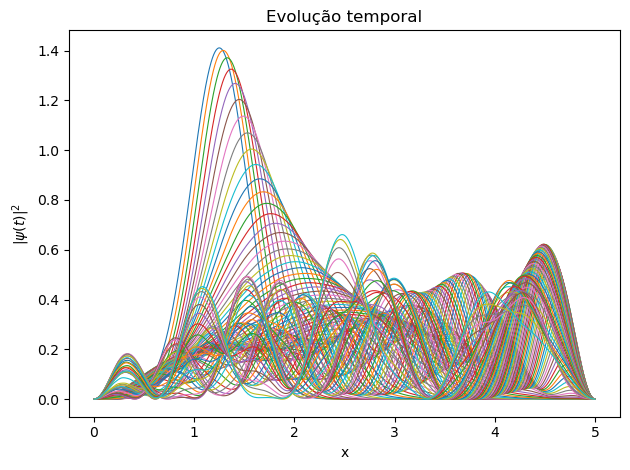

In [8]:
for i in range(len(psi)):
    plt.title("Evolução temporal" )
    plt.plot(x, np.abs(psi[i])**2, label=f' tempo t = {i}', lw=0.8)
    plt.xlabel('x')
    plt.ylabel(r'$|\psi(t)|^2$' )
    plt.tight_layout()


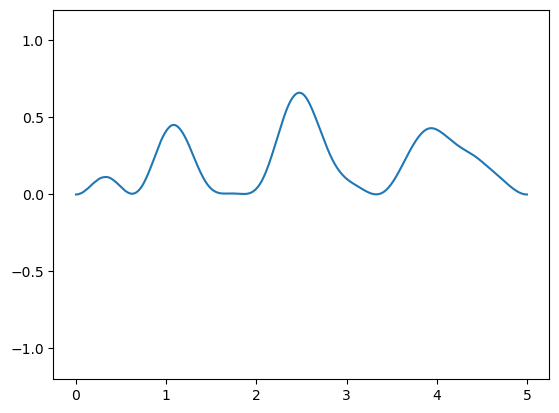

In [12]:
import matplotlib.animation as animation

psi_squares = [np.abs(psi_)**2 for psi_ in psi]

# Função para atualizar o gráfico a cada quadro da animação
def update_plot(i, data, line):
    line.set_ydata(data[i])
    return line,

# Configuração inicial do gráfico
fig, ax = plt.subplots()
line, = ax.plot(x, psi_squares[0])
ax.set_ylim(-1.2, 1.2)

# Criação da animação
ani = animation.FuncAnimation(fig, update_plot, frames=len(psi_squares), fargs=(psi_squares, line), interval=20)

# Salvar a animação em um arquivo de vídeo
ani.save('animation.mp4', writer='ffmpeg')

# Mostrar o gráfico
plt.show()